In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt


plt.style.use('dark_background')

In [ ]:
75

75

Менеджер Виноградного Дня утверждает что 80% клиентов удовлетворены напитком. Мы опросили 100 человек. 75 довольны. Какой вывод мы можем сделать?

Допустим что удовлетворенность равна 80%. Какова при этом вероятность получить удовлетворенность 75% и ниже при выворке в 100 человек?

H0: удовлетворенность == 80%  
H1: удовлетворенность < 80%

In [ ]:
np.random.binomial(1,0.8,size=100).mean()

0.85

In [ ]:
np.random.binomial(1,0.8,size=100).mean() <= 0.75

False

In [ ]:
np.mean([np.random.binomial(1,0.8,size=100).mean() <= 0.75 for _ in range(10)])

0.2

p-value

In [ ]:
np.mean([np.random.binomial(1,0.8,size=100).mean() <= 0.75 for _ in range(10000)])

0.1353

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
proportions_ztest(75,100,value=0.8,alternative='smaller')

(-1.1547005383792526, 0.12410653949496159)

In [ ]:
import seaborn as sns

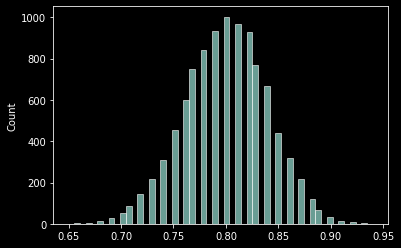

In [ ]:
sns.histplot([np.random.binomial(1,0.8,size=100).mean() for _ in range(10000)])

In [ ]:
0.1297

0.1297

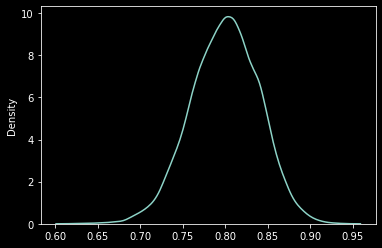

In [ ]:
sns.kdeplot([np.random.binomial(1,0.8,size=100).mean() for _ in range(10000)])

Конверсия на текущем лендинге составляет 10%. Покажем новый лендос только 30% клиентов.

In [ ]:
df = pd.DataFrame({'group':['old landing (A)', 'new landing (B)'],
                   'lead':[700,300], 'sale':[70,48]})

In [ ]:
df

,group,lead,sale
0,old landing (A),700,70
1,new landing (B),300,48


In [ ]:
df['cr'] = df['sale'] / df['lead']

In [ ]:
df

,group,lead,sale,cr
0,old landing (A),700,70,0.10
1,new landing (B),300,48,0.16


Допустим, что никакой разницы нет. Какова вероятность получить такие же и большие различия при том, что никакой разницы нет?

In [ ]:
(70 + 48) / 1000

0.118

In [ ]:
np.random.binomial(1,0.118,size=700).mean()

0.13428571428571429

In [ ]:
np.random.binomial(1,0.118,size=300).mean()

0.10666666666666667

In [ ]:
np.random.binomial(1,0.118,size=300).mean() - np.random.binomial(1,0.118,size=700).mean()

-0.013333333333333336

https://stats.stackexchange.com/questions/535142/two-tailed-test-for-two-samples-can-we-say-that-one-mean-proportion-greater-t

In [ ]:
df

,group,lead,sale,cr
0,old landing (A),700,70,0.10
1,new landing (B),300,48,0.16


In [ ]:
abs(np.random.binomial(1,0.118,size=300).mean() - np.random.binomial(1,0.118,size=700).mean())

0.005714285714285713

In [ ]:
abs(0.1 - 0.16)

0.06

In [ ]:
abs(np.random.binomial(1,0.118,size=300).mean()
- np.random.binomial(1,0.118,size=700).mean()) >= 0.06

False

In [ ]:
[abs(np.random.binomial(1,0.118,size=300).mean()
- np.random.binomial(1,0.118,size=700).mean()) >= 0.06 for _ in range(10)]

[False, False, False, False, False, False, False, False, False, False]

In [ ]:
np.mean([abs(np.random.binomial(1,0.118,size=300).mean()
- np.random.binomial(1,0.118,size=700).mean()) >= 0.06 for _ in range(10000)])

0.0074

In [ ]:
df

,group,lead,sale,cr
0,old landing (A),700,70,0.10
1,new landing (B),300,48,0.16


In [ ]:
proportions_ztest([70,48],[700,300])

(-2.695166510284625, 0.007035346384355496)

Уровень значимости или alpha

In [ ]:
0.05

0.05

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
n = 1000
result = []
for _ in tqdm(range(n)):
  a = np.random.binomial(1,0.118,size=700)
  b = np.random.binomial(1,0.118,size=300)
  diff = abs(a.mean() - b.mean())
  null_hyp_prob = np.concatenate([a,b]).mean()
  pval = np.mean([abs(np.random.binomial(1,null_hyp_prob,size=300).mean()
  - np.random.binomial(1,null_hyp_prob,size=700).mean()) >= diff for _ in range(1000)])
  result.append(pval)

  0%|          | 0/1000 [00:00<?, ?it/s]

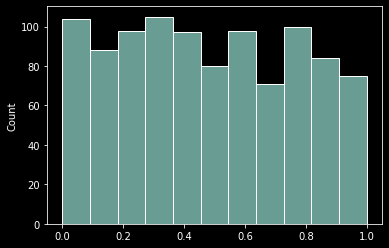

In [ ]:
sns.histplot(result)

In [ ]:
(np.array(result) < 0.05).mean()

0.061

In [ ]:
df = pd.DataFrame(np.random.normal(size=1000))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2473a13d50>]],
      dtype=object)

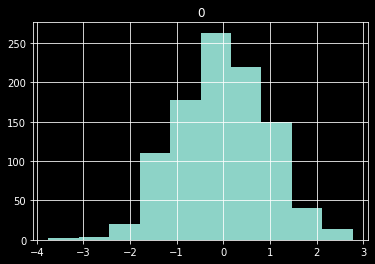

In [ ]:
df.hist()

In [ ]:
df = df.sort_values(0)

In [ ]:
df['cnt'] = range(1,1001)

In [ ]:
df['pct'] = df['cnt'] / 1000

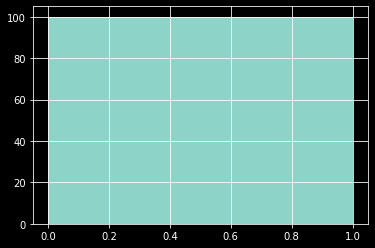

In [ ]:
df['pct'].hist()

In [ ]:
df

,0,cnt,pct
618,-3.749299,1,0.001
698,-3.133992,2,0.002
307,-2.803298,3,0.003
361,-2.739699,4,0.004
764,-2.619898,5,0.005
...,...,...,...
21,2.499273,996,0.996
691,2.578311,997,0.997
514,2.635417,998,0.998
125,2.697100,999,0.999


In [ ]:
df['bin'] = pd.cut(df['pct'],10)

In [ ]:
df.groupby('bin')['pct'].count()

bin
(1e-06, 0.101]    100
(0.101, 0.201]    100
(0.201, 0.301]    100
(0.301, 0.401]    100
(0.401, 0.5]      100
(0.5, 0.6]        100
(0.6, 0.7]        100
(0.7, 0.8]        100
(0.8, 0.9]        100
(0.9, 1.0]        100
Name: pct, dtype: int64

In [ ]:
n = 1000
result = []
for _ in tqdm(range(n)):
  a = np.random.binomial(1,0.10,size=700)
  b = np.random.binomial(1,0.12,size=300)
  diff = abs(a.mean() - b.mean())
  null_hyp_prob = np.concatenate([a,b]).mean()
  pval = np.mean([abs(np.random.binomial(1,null_hyp_prob,size=300).mean()
  - np.random.binomial(1,null_hyp_prob,size=700).mean()) >= diff for _ in range(1000)])
  result.append(pval)

  0%|          | 0/1000 [00:00<?, ?it/s]

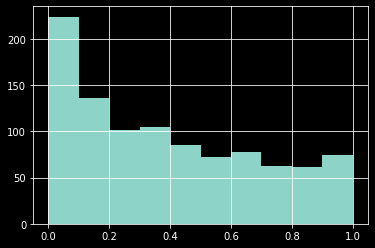

In [ ]:
pd.Series(result).hist()

In [ ]:
(pd.Series(result) < 0.05).mean()

0.155

In [ ]:
n = 1000
result = []
for _ in tqdm(range(n)):
  a = np.random.binomial(1,0.10,size=700)
  b = np.random.binomial(1,0.15,size=300)
  diff = abs(a.mean() - b.mean())
  null_hyp_prob = np.concatenate([a,b]).mean()
  pval = np.mean([abs(np.random.binomial(1,null_hyp_prob,size=300).mean()
  - np.random.binomial(1,null_hyp_prob,size=700).mean()) >= diff for _ in range(1000)])
  result.append(pval)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
(pd.Series(result) < 0.05).mean()

0.612

In [ ]:
3/7

0.42857142857142855

In [ ]:
import statsmodels.stats.api as sms
es = sms.proportion_effectsize(0.10, 0.15)
sms.NormalIndPower().solve_power(es, power=0.584, alpha=0.05, ratio=3/7)

681.5816650531352

In [ ]:
681.5816650531352 * 3/7

292.1064278799151

In [ ]:
import statsmodels.stats.api as sms
es = sms.proportion_effectsize(0.10, 0.15)
sms.NormalIndPower().solve_power(es, power=0.80, alpha=0.05, ratio=1)

680.3526619127882

In [ ]:
n = 1000
result = []
for _ in tqdm(range(n)):
  a = np.random.binomial(1,0.10,size=680)
  b = np.random.binomial(1,0.15,size=680)
  diff = abs(a.mean() - b.mean())
  null_hyp_prob = np.concatenate([a,b]).mean()
  pval = np.mean([abs(np.random.binomial(1,null_hyp_prob,size=680).mean()
  - np.random.binomial(1,null_hyp_prob,size=680).mean()) >= diff for _ in range(1000)])
  result.append(pval)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
(pd.Series(result) < 0.05).mean()

0.82

In [ ]:
n = 10000
result = []
for _ in tqdm(range(n)):
  a = np.random.binomial(1,0.10,size=680)
  b = np.random.binomial(1,0.15,size=680)
  #diff = abs(a - b)
  _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
  result.append(pval)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
(pd.Series(result) < 0.05).mean()

0.805